# CNN을 활용한 포켓몬 분류

## 들어가기전에 앞서 (용어 간략 설명)

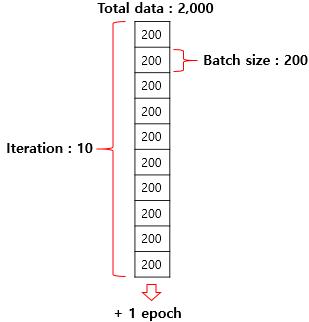

- Batch size : 전체 훈련 데이터들을 특정 개수로 나눴을 때 그 작은 뭉치(미니 배치)
- Iteration : 하나의 미니 배치를 학습할때 1 iteration
- epoch : 전체 훈련 데이터가 학습에 한 번 사용된 주기

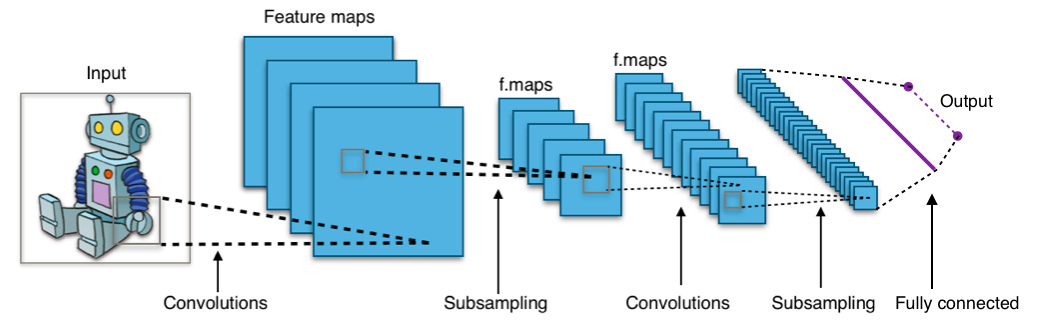

합성곱 신경망(Convolution Neral Network)
- 이미지 처리에 탁월한 성능을 보이는 신경망
- 크게 합성곱층(Convolution layer)과 풀링층(Pooling layer)으로 구성
- CONV는 합성곱 연산을 의미, CONV의 결과가 활성화 함수 ReLU를 지남 -> 이 과정을 합성곱층
- 이후 POOL이라는 구간을 지남 -> 풀링 연산을 의미하며 풀링층이라고 함
- 다층 퍼셉트론 MLP의 한계점(사람이 봤을때 같은 이미지여도 휘갈겨쓰거나 조금만 불규칙한 픽셀의 구조로 인해 민감하게 예측에 영향을 받는다는 단점)
- 따라서 공간적인 구조 정보를 보존하면서 학습할 수 있는 방법인 CNN


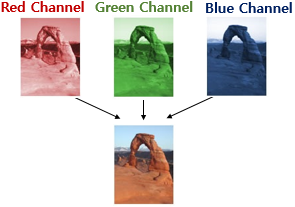


채널(Channel)
- 이미지 처리의 기본 용어
- 이미지는 { 높이(이미지 세로방향 픽셀수), 너비(이미지 가로방향 픽셀수), 채널(색 성분) }이라는 3차원의 텐서
- ㄴ 흑백 이미지 경우 채널 수 : 1, 각 픽셀은 0~255사이 값
- 통상적으로 접근하는 컬러 이미지는 R,G,B 이므로 채널 수가 3
- 채널은 깊이라고도 말함
- 색상이 있는 이미지 파일 하나는 (높이, 너비, 깊이) 라는 3차원의 텐서로 표현된다.


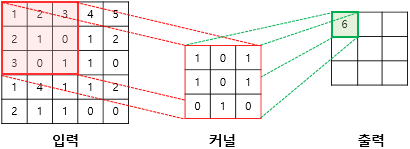


합성곱 연산(Covolution operation)
- 이미지 특징을 추출하는 연산과정
- 커널(kernel) 또는 필터(filter) 라는 n x m 크기의 행렬로 높이 x 너비 크기의 이미지를 쭉 훑으며 각 이미지와 커널의 원소의 값을 곱하여 모두 더한 값을 출력
- 커널의 일반적 크기는 3 x 3 , 5 x 5 사용
- 5 x 5 이미지를 3 x 3 커널로 쭉 훑을 경우 9번의 스텝(step)을 거침. 최종 결과는 3 x 3 의 특성 맵(feature map)을 도출
- 위 예시에서 커널의 이동범위를 1로 하였음. 이러한 이동 범위를 스트라이드(stride) 라고 함


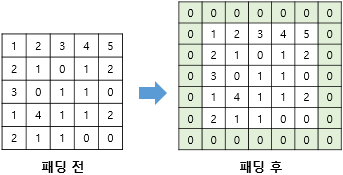


패딩(Padding)
- 합성곱 연산 이후에도 특성 맵의 크기가 입력의 크기와 동일하게 유지되도록 하고 싶다면 패딩(padding)을 사용하면 됨.
- 합성곱 연산하기전 입력의 가장자리에 지정된 개수만큼 행과 열을 추가해주는 것
- 주로 값을 0으로 채우게되는데 이를 제로 패딩(zero padding) 이라고함

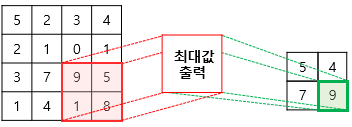

풀링(Pooling)
- 일반적으로 합성곱 층(합성곱 연산 + 활성화 함수) 다음에는 풀링 층을 추가하는 것이 일반적
- 풀링 층에서 특성 맵을 다운샘플링하여 특성 맵의 크기를 줄이는 풀링 연산이 이루어짐
- 일반적으로 최대 풀링(max pooling)과 평균 풀링(average pooling)이 있음
- 풀링 연산에도 커널과 스트라이드 개념이 있지만, 학습해야할 가중치가 없으며 연산 후에 채널 수가 변하지 않는다는 점으로 합성곱 연산과 차이가 있다.
- 풀링을 사용하면 -> 특성 맵 크기 줄어듦, 특성 맵의 가중치의 개수도 줄어듦


이외
- 각 합성곱 연산마다 이미지의 모든 픽셀을 사용하는 것이 아니라, 커널과 맵핑되는 픽셀만을 입력으로 사용하는 것을 볼 수 있음.
  결국 합성곱 신경망은 다층 퍼셉트론을 사용할 때보다 훨씬 적은 수의 가중치를 사용하며 공간적 구조 정보를 보존한다는 특징
- 입력 데이터의 채널 수와 커널의 채널 수는 같아야 함
- CNN 의 bias는 커널을 적용한 뒤 더해짐

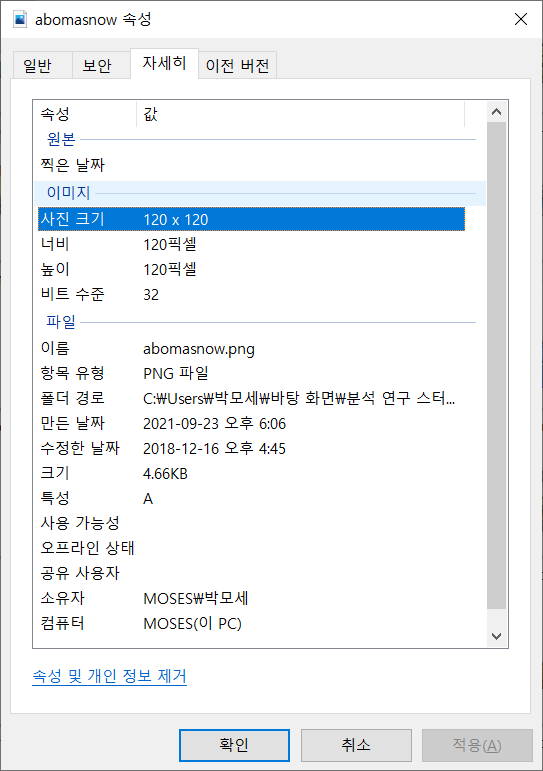

- 너비 : 120, 높이 : 120, 깊이 : 3

In [ ]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from os import listdir
from os.path import isfile, join

import re

from google.colab import drive
drive.mount('/content/drive')


import os
from shutil import copyfile
from shutil import copyfile, copy2

from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# 파이토치
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pokemons = pd.read_csv('/content/drive/MyDrive/data/pokemon.csv')
numbers = []
for i in range(1,pokemons.shape[0]+1):
    numbers.append(i)
pokemons['pkn'] = numbers
IMG_DIR = '/content/drive/MyDrive/data/image/pokemon_images'

onlyfiles = [f for f in listdir(IMG_DIR) if isfile(join(IMG_DIR, f))]

In [ ]:
from os import walk

f = []
for (dirpath, dirnames, filenames) in walk(mypath):
    f.extend(filenames)
    break

In [ ]:
onlylist = []
for f in listdir(IMG_DIR)
  if isfile(join(IMG_DIR, f))
    onlylist = f

SyntaxError: ignored

In [ ]:
pokemons.head()

,Name,Type1,Type2,pkn
0,bulbasaur,Grass,Poison,1
1,ivysaur,Grass,Poison,2
2,venusaur,Grass,Poison,3
3,charmander,Fire,NaN,4
4,charmeleon,Fire,NaN,5


In [ ]:
dataframe_img = pd.DataFrame([])
images = []
pokemon_name = []
for img in onlyfiles:
    if not re.search('-', img):
        pkn = img.split('.')
        name =  pkn[0]
        path = IMG_DIR +'/' +str(img)
        images.append(path)
        pokemon_name.append(name)
dataframe_img['images'] = images
dataframe_img['Name'] = pokemon_name

result = pokemons.merge(dataframe_img, left_on='Name', right_on='Name')
result

,Name,Type1,Type2,pkn,images
0,bulbasaur,Grass,Poison,1,/content/drive/MyDrive/data/image/pokemon_imag...
1,ivysaur,Grass,Poison,2,/content/drive/MyDrive/data/image/pokemon_imag...
2,venusaur,Grass,Poison,3,/content/drive/MyDrive/data/image/pokemon_imag...
3,charmander,Fire,NaN,4,/content/drive/MyDrive/data/image/pokemon_imag...
4,charmeleon,Fire,NaN,5,/content/drive/MyDrive/data/image/pokemon_imag...
...,...,...,...,...,...
769,stakataka,Rock,Steel,805,/content/drive/MyDrive/data/image/pokemon_imag...
770,blacephalon,Fire,Ghost,806,/content/drive/MyDrive/data/image/pokemon_imag...
771,zeraora,Electric,NaN,807,/content/drive/MyDrive/data/image/pokemon_imag...
772,meltan,Steel,NaN,808,/content/drive/MyDrive/data/image/pokemon_imag...


- 각 이미지에 대한 주소값과 기존 pokemon 데이터를 통합
- Type2 에 NaN 값이 존재 -> 속성을 하나만 가지고 있는 포켓몬이기 때문  -> Type1 값으로 대체하기로

In [ ]:
print(result['Type1'].isnull().sum(), result['Type2'].isnull().sum()) # 속성1은 결측값 0, 속성2는 결측값 391개

0 391


In [ ]:
result['Type2'] = result.Type2.fillna(0) # 결측값 : 일단 0으로 값을 채움
for i in range(len(result)):
  if result['Type2'][i] == 0 :
    result['Type2'][i] = result['Type1'][i]

print(result['Type2'].head(10))

0    Poison
1    Poison
2    Poison
3      Fire
4      Fire
5    Flying
6     Water
7     Water
8     Water
9       Bug
Name: Type2, dtype: object


In [ ]:
result # 왜 774개지

,Name,Type1,Type2,pkn,images
0,bulbasaur,Grass,Poison,1,/content/drive/MyDrive/data/image/pokemon_imag...
1,ivysaur,Grass,Poison,2,/content/drive/MyDrive/data/image/pokemon_imag...
2,venusaur,Grass,Poison,3,/content/drive/MyDrive/data/image/pokemon_imag...
3,charmander,Fire,Fire,4,/content/drive/MyDrive/data/image/pokemon_imag...
4,charmeleon,Fire,Fire,5,/content/drive/MyDrive/data/image/pokemon_imag...
...,...,...,...,...,...
769,stakataka,Rock,Steel,805,/content/drive/MyDrive/data/image/pokemon_imag...
770,blacephalon,Fire,Ghost,806,/content/drive/MyDrive/data/image/pokemon_imag...
771,zeraora,Electric,Electric,807,/content/drive/MyDrive/data/image/pokemon_imag...
772,meltan,Steel,Steel,808,/content/drive/MyDrive/data/image/pokemon_imag...


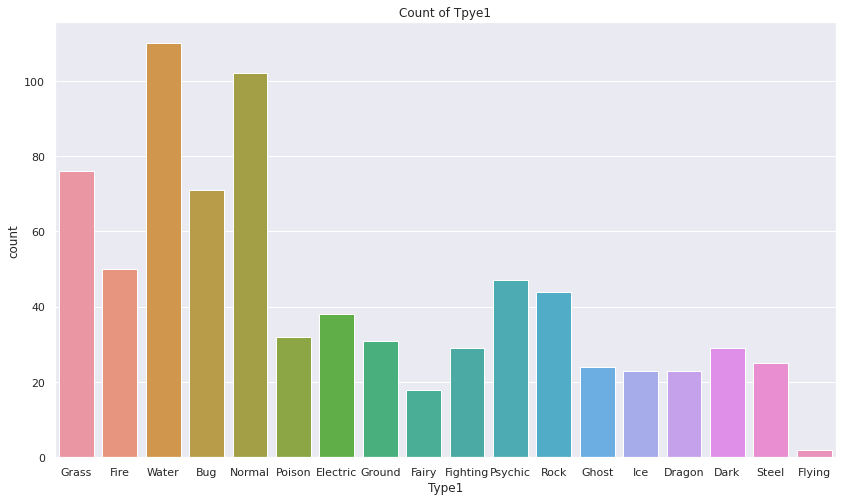

In [ ]:
sns.set(rc={'figure.figsize':(14, 8)}) # 사이즈 조정
sns.countplot(x='Type1', data=result)
plt.title("Count of Tpye1")
plt.show()

- 물리: 노말, 격투, 독, 땅, 비행, 벌레, 바위, 고스트, 강철
- 특수: 풀, 불꽃, 물, 전기, 얼음, 에스퍼, 드래곤, 악
- 
<a href="https://namu.wiki/w/%ED%8F%AC%EC%BC%93%EB%AA%AC%EC%8A%A4%ED%84%B0/%ED%83%80%EC%9E%85">포켓몬 타입 설명 나무위키</a>

- 비행과 페어리 속성은 표본이 매우 작아 잘 적합되지 않을 것으로 추정

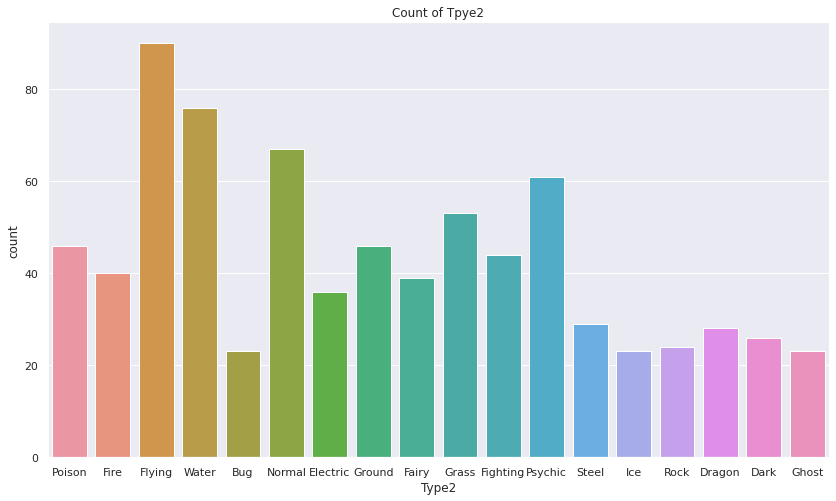

In [ ]:
sns.set(rc={'figure.figsize':(14, 8)}) # 사이즈 조정
sns.countplot(x='Type2', data=result)
plt.title("Count of Tpye2")
plt.show()

In [ ]:
Type1_classes = result['Type1'].unique()
Type1_classes

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [ ]:
wd = '/content/drive/MyDrive/data/image/pokemon_images'
os.chdir(wd) # 워킹 디렉토리 설정

In [ ]:
# for i in range(len(Type1_classes)) : # class별 폴더 생성
#  os.mkdir(Type1_classes[i])

In [ ]:
len(os.listdir(os.getcwd())) - 18

809

In [ ]:
png_name_list = os.listdir(os.getcwd())[:809] # 현재 워킹디렉토리의 파일 리스트 출력, 809번까지 출력 이유는 해당 워킹디렉토리에 class별 폴더가 있기 때문
png_name_list[800:809] # 뒷부분만 확인해서 잘 추출되었는지 확인, xatu 포켓몬이 마지막

['yamask.png',
 'yanmega.png',
 'zapdos.png',
 'xurkitree.jpg',
 'yanma.png',
 'zangoose.png',
 'yveltal.png',
 'xerneas.png',
 'xatu.png']

In [ ]:
png_name_list[0].split(".")[0]

'abomasnow'

In [ ]:
pokemons['Type1'][pokemons['Name'] == pokemons['Name'][0]] # object 형으로 추출됨

0    Grass
Name: Type1, dtype: object

In [ ]:
pokemons['Type1'][pokemons['Name'] == pokemons['Name'][51]]

51    Normal
Name: Type1, dtype: object

In [ ]:
pokemons.loc[0, 'Type1'] # df.loc['row', 'col']

'Grass'

In [ ]:
wd + "/" + png_name_list[0]

'/content/drive/MyDrive/data/image/pokemon_images/abomasnow.png'

In [ ]:
wd + '/' + pokemons.loc[0, 'Type1'] + '/' + png_name_list[0]

'/content/drive/MyDrive/data/image/pokemon_images/Grass/abomasnow.png'

In [ ]:
이미지 파일 클래스 파일 별로 이동시키기
import shutil

class_dir = Type1_classes #  속성 클래스 리스트
png_name_list # png파일 이름 리스트

for i in range(len(pokemons)):
  for j in range(len(pokemons)) :
    if png_name_list[i].split(".")[0] == pokemons.loc[j, 'Name'] :
      shutil.copy(wd + "/" + png_name_list[i] , wd + '/' + pokemons.loc[j, 'Type1'] + '/' + png_name_list[i])

- 총 4분 19초 걸렸음, 더 방대한 이미지 데이터를 다룰때는 어떻게 해결해야 할지..? (loop 2개에 809*809개씩 확인했기 때문)
- working directory 에서 페어리와 비행 포켓몬을 보고 잘 처리되었음을 알 수 있었음.

## Pytorch 활용 CNN

### 데이터 로드 및 설정

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
glob('/content/drive/MyDrive/data/image/pokemon_images/*/*.png') # '*' 의 의미는? -> 데이터베이스 count(*) 랑 비슷한 개념 모든 것을 포함한다는 뜻

In [ ]:
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform
from glob import glob

transform = transforms.Compose(
    [transforms.Resize((255,255)),
     # transforms.ToPILImage(), 이걸 넣어도 오류..
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

classes = ('Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
           'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
           'Dragon', 'Dark', 'Steel', 'Flying')

def get_label(data_path_list):
    label_list = []
    for path in data_path_list:
        # 뒤에서 두번째가 class다.
        label_list.append(path.split('/')[-2])
    return label_list

class PokemonSet(Dataset):
    #data_path_list - 이미지 path 전체 리스트
    #label - 이미지 ground truth
    def __init__(self, data_path_list, classes, transform=None):
        self.path_list = data_path_list
        self.label = get_label(data_path_list)
        self.transform = transform
        self.classes = classes
        
    def get_label(data_path_list):
        label_list = []
        for path in data_path_list:
            # 뒤에서 두번째가 class다.
            label_list.append(path.split('/')[-2])
        return label_list

    def __len__(self):
        return len(self.path_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        image = io.imread(self.path_list[idx])
        if self.transform is not None:
            image = self.transform(image)
        return image, self.classes.index(self.label[idx])

DATA_PATH_TRAINING_LIST = glob('/content/drive/MyDrive/data/image/pokemon_images/*/*.png')

trainloader = torch.utils.data.DataLoader(
    PokemonSet(
        DATA_PATH_TRAINING_LIST,
        classes,
        transform=transform
    ),
    batch_size=100,
    shuffle = True
)

In [ ]:
print(trainloader)

In [ ]:
for data in trainloader:
    images, labels = data
    print(images.size()) # 텐서 사이즈가 출력이 되어야 함
    print(labels.size()) # class의 수 가 출력 되어야 함

TypeError: ignored

### CNN 모델링

## 여기 다시 해볼 것

In [ ]:
import torch
import torch.nn as nn

In [ ]:
# 배치 크기 × 채널 × 높이(height) × 너비(widht)의 크기의 텐서를 선언
inputs = torch.Tensor(1, 3, 120, 120) # 1바퀴 학습할 것이고 채널은 3 (컬러 이미지이기 때문, R,G,B 3개), 각 이미지 파일이 120 X 120 Pixels 로 구성
print('텐서의 크기 : {}'.format(inputs.shape))

텐서의 크기 : torch.Size([1, 3, 120, 120])


#### 합성곱(Convolution) 과 풀링(pooling) 선언

In [ ]:
conv = nn.Conv2d(3, 32, 3, padding=1) #  3 채널을 input 받고 32채널을 뽑아내는 데 커널 사이즈는 3, 패딩은 1
print(conv)

Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [ ]:
pool = nn.MaxPool2d(2) # 정수값 하나 기입시 커널 사이즈와 스트라이드가 둘 다 해당값으로 지정됨
print(pool)

MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)


In [ ]:
out = conv(inputs) # 32채널의 아웃풋 120 x 120 텐서로 생성
print(out.shape)

torch.Size([1, 32, 120, 120])


In [ ]:
# 첫번째 차원인 배치 차원은 그대로 두고 나머지는 펼쳐라
out = out.view(out.size(0), -1)
print(out.shape)

torch.Size([1, 10])


In [ ]:
fc = nn.Linear(460800, 10) # input_dim = 3,136, output_dim = 10
out = fc(out)
print(out.shape)

RuntimeError: ignored

### CNN(합성곱 신경망 모델)

In [ ]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 랜덤 시드 고정
torch.manual_seed(777)

# GPU 사용 가능일 경우 랜덤 시드 고정
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [ ]:
# 하이퍼파라미터 설정 (그냥 임의로 설정한 것)
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [ ]:
class CNN(torch.nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        # 첫번째층
        # ImgIn shape=(?, 28, 28, 1)
        #    Conv     -> (?, 28, 28, 32)
        #    Pool     -> (?, 14, 14, 32)
        self.layer1 = torch.nn.Sequential(
            torch.nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 두번째층
        # ImgIn shape=(?, 14, 14, 32)
        #    Conv      ->(?, 14, 14, 64)
        #    Pool      ->(?, 7, 7, 64)
        self.layer2 = torch.nn.Sequential(
            torch.nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            torch.nn.ReLU(),
            torch.nn.MaxPool2d(kernel_size=2, stride=2))

        # 전결합층 7x7x64 inputs -> 10 outputs
        self.fc = torch.nn.Linear(7 * 7 * 64, 10, bias=True)

        # 전결합층 한정으로 가중치 초기화
        torch.nn.init.xavier_uniform_(self.fc.weight)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)   # 전결합층을 위해서 Flatten
        out = self.fc(out)
        return out

In [ ]:
# CNN 모델 정의
model = CNN().to(device)

In [ ]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(trainloader)
print('총 배치의 수 : {}'.format(total_batch))

총 배치의 수 : 8


- 총 배치 수는 8 이고 배치 크기를 100으로 설정했으므로 학습 데이터는 800개 입니다. 1바퀴(1 iteration)만 학습

In [ ]:
for epoch in range(training_epochs):
    avg_cost = 0

    for X, Y in trainloader: # 미니 배치 단위로 꺼내온다. X는 미니 배치, Y는 레이블.

        X = X.to(device)
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = model(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('[Epoch: {:>4}] cost = {:>.9}'.format(epoch + 1, avg_cost))

TypeError: ignored

### 이미지 출처
- https://wikidocs.net/62306
- 